Enabling the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

Reading the data

In [2]:
df = pd.read_csv('takehome_users.csv',encoding='latin-1')
df1= pd.read_csv('takehome_user_engagement.csv')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


checking the data values

In [3]:
df1.head()

,time_stamp,user_id,visited
0,4/22/2014 3:53,1,1
1,11/15/2013 3:45,2,1
2,11/29/2013 3:45,2,1
3,12/9/2013 3:45,2,1
4,12/25/2013 3:45,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


There are null values for "Last_session_creation_time" and "Invited_by_user_id". we have to perorm the data cleanup first

In [5]:
df.creation_time= pd.to_datetime(df.creation_time)
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time,unit='s')

In [6]:
df[df.creation_time>df.last_session_creation_time]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [7]:
df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0
11996,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN
11997,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0
11998,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN


We will fill all NaN values in invited_by_user_id with 0.

In [8]:
df.invited_by_user_id.fillna(0,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


now "invited_by_user_id" has 12000 non null values

In [10]:
df.last_session_creation_time.fillna(df.creation_time,inplace=True)

In [ ]:
df.info()

Now there are no Null values.

In [12]:
df.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,12000,12000.000000,12000.000000,12000.000000,12000.000000
unique,NaN,11930,11355,11980,5,11991,NaN,NaN,NaN,NaN
top,NaN,2014-04-16 09:27:00,Araujo Gabriela,AlfieLane@yahoo.com,ORG_INVITE,2013-07-03 21:49:00,NaN,NaN,NaN,NaN
freq,NaN,3,5,2,4254,2,NaN,NaN,NaN,NaN
first,NaN,2012-05-31 00:43:00,NaN,NaN,NaN,2012-05-31 08:20:06,NaN,NaN,NaN,NaN
last,NaN,2014-05-30 23:59:00,NaN,NaN,NaN,2014-06-06 14:58:50,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,NaN,0.249500,0.149333,141.884583,3188.691333
std,3464.24595,NaN,NaN,NaN,NaN,NaN,0.432742,0.356432,124.056723,3869.027693
min,1.00000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,29.000000,0.000000


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [14]:
df1.visited.value_counts()

1    207917
Name: visited, dtype: int64

In [15]:
df1.drop(['visited'],axis=1,inplace=True)

In [16]:
df1.head()

,time_stamp,user_id
0,4/22/2014 3:53,1
1,11/15/2013 3:45,2
2,11/29/2013 3:45,2
3,12/9/2013 3:45,2
4,12/25/2013 3:45,2


In [17]:
df1.time_stamp= pd.to_datetime(df1.time_stamp)
df1

,time_stamp,user_id
0,2014-04-22 03:53:00,1
1,2013-11-15 03:45:00,2
2,2013-11-29 03:45:00,2
3,2013-12-09 03:45:00,2
4,2013-12-25 03:45:00,2
...,...,...
207912,2013-09-06 06:14:00,11996
207913,2013-01-15 18:28:00,11997
207914,2014-04-27 12:45:00,11998
207915,2012-06-02 11:55:00,11999


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [19]:
u1=df[['object_id','org_id','invited_by_user_id']].copy()
r1=df[['object_id','org_id']].copy()
df2 = pd.merge(u1,r1,how='left',left_on='invited_by_user_id',right_on='object_id')
df2.head()

,object_id_x,org_id_x,invited_by_user_id,object_id_y,org_id_y
0,1,11,10803.0,10803.0,11.0
1,2,1,316.0,316.0,1.0
2,3,94,1525.0,1525.0,94.0
3,4,1,5151.0,5151.0,1.0
4,5,193,5240.0,5240.0,193.0


In [27]:
temp = df.org_id.value_counts()
df['org_size'] = [temp[i] for i in df.org_id]
df['referred'] = df.invited_by_user_id!=0

df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,40,True
11996,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,25,False
11997,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,27,True
11998,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,138,False


In [21]:
def get_visit_count(grp, freq):
    return grp.rolling(freq, on='time_stamp')['user_id'].count()

df1['7_day_visit'] = df1.groupby('user_id', as_index=False, group_keys=False).apply(get_visit_count, '7D')

# Creating a data frame with adopted_user status against the user_id
dfusr_adopted = df1.groupby('user_id')['7_day_visit'].max().to_frame().reset_index()
dfusr_adopted['adopted_user'] = (dfusr_adopted['7_day_visit']>2)
dfusr_adopted.head()

,user_id,7_day_visit,adopted_user
0,1,1.0,False
1,2,3.0,True
2,3,1.0,False
3,4,1.0,False
4,5,1.0,False


In [29]:


# Merging 2 dataframes

df3 = pd.merge(df,dfusr_adopted,how='outer',left_on='object_id',right_on='user_id').drop(['user_id','7_day_visit'],axis=1)



In [31]:
df3.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False


In [32]:


df3.adopted_user.fillna(False,inplace=True)

# Adding one more column for checking if the reference user is adopted
df3 = pd.merge(df3,df3[['object_id','adopted_user']], how='left',left_on='invited_by_user_id',right_on='object_id')
df3.drop('object_id_y',axis=1,inplace=True)
df3.rename(columns={'object_id_x':'object_id','adopted_user_x':'adopted_user','adopted_user_y':'adopted_reference'},inplace=True)
df3.adopted_reference.fillna(False,inplace=True)
df3.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False,False
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True,False
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False,True
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False,True
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False,True


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

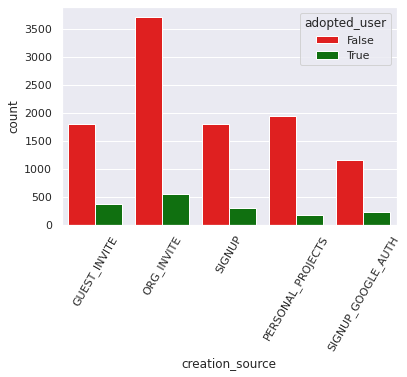

In [35]:
import seaborn as sns
sns.set()

sns.countplot(x="creation_source", data=df3,hue='adopted_user',palette=['red','green'])
plt.xticks(rotation=60)